<div style="
    background-color: #1f1f1f; 
    padding: 30px; 
    border-radius: 15px; 
    border-left: 10px solid #00bcd4;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 20px rgba(0, 188, 212, 0.3);
">
  <h1 style="
      color: #00e5ff; 
      font-size: 36px; 
      margin-bottom: 10px;
  ">
    💎 Diamond Mine: <span style="color: #ffffff;">Uncovering Value Through Data</span>
  </h1>
  <p style="color: #b0bec5; font-size: 18px;">
    A data-driven journey to decode the hidden factors that shape the worth of diamonds.
  </p>
</div>


In [4]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

## 📥 Data Import & Overview

In [160]:
df = pd.read_csv(r"D:\Users\Asus_X509\Desktop\Data set for python\diamonds.csv")

## 📊 Exploratory Data Analysis (EDA)

In [109]:
# Let's look at the first 5 rows of the dataset to start having a better understanding

df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume,log_price,price_per_carat
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,5.786897,1417.391304
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,5.786897,1552.380952
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,5.789960,1421.739130
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,5.811141,1151.724138
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,5.814131,1080.645161
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952,5.817111,1400.000000
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870,5.817111,1400.000000
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,5.820083,1296.153846
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214,5.820083,1531.818182
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000,5.823046,1469.565217


In [111]:
# Let's analyze the size of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       53940 non-null  int64  
 1   carat            53940 non-null  float64
 2   cut              53940 non-null  object 
 3   color            53940 non-null  object 
 4   clarity          53940 non-null  object 
 5   depth            53940 non-null  float64
 6   table            53940 non-null  float64
 7   price            53940 non-null  int64  
 8   x                53940 non-null  float64
 9   y                53940 non-null  float64
 10  z                53940 non-null  float64
 11  volume           53940 non-null  float64
 12  log_price        53940 non-null  float64
 13  price_per_carat  53940 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 5.8+ MB


In [8]:
df.shape

(53940, 11)

In [9]:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<h3 style="color: #2F4F4F;">📊 Dataset Summary</h3>

<ul>
  <li><b style="color: #4682B4;">Rows:</b> 53,940</li>
  <li><b style="color: #4682B4;">Columns:</b> 10</li>
</ul>

<p><b style="color: #6A5ACD;">Qualitative Features:</b> <code>Cut</code>, <code>Color</code>, <code>Clarity</code></p>
<p><b style="color: #228B22;">Quantitative Features:</b> <code>Carat</code>, <code>Depth</code>, <code>Table</code>, <code>X</code>, <code>Y</code>, <code>Z</code></p>
<p><b style="color: #B22222;">🎯 Target Variable:</b> <code>Price</code></p>


In [113]:
# Null values analysis 

df.isnull().sum()

Unnamed: 0         0
carat              0
cut                0
color              0
clarity            0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
volume             0
log_price          0
price_per_carat    0
dtype: int64

In [14]:
df.columns


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [23]:
df['cut'].unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [115]:
df['clarity'].nunique()


8

In [117]:
df['clarity'].unique()


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [39]:
df['color'].nunique()


7

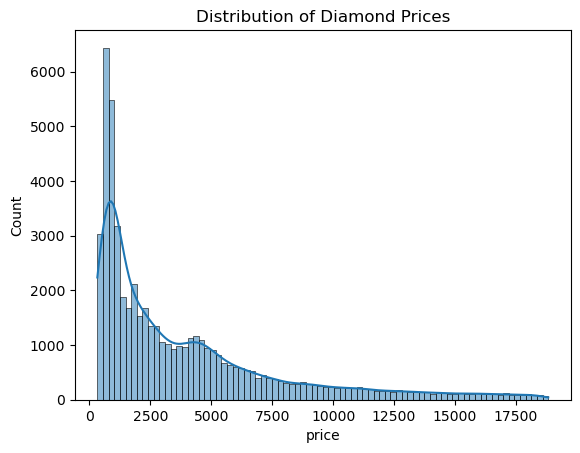

In [41]:
# What is the distribution of diamond prices?

sns.histplot(df['price'], kde=True)
plt.title("Distribution of Diamond Prices")
plt.show()


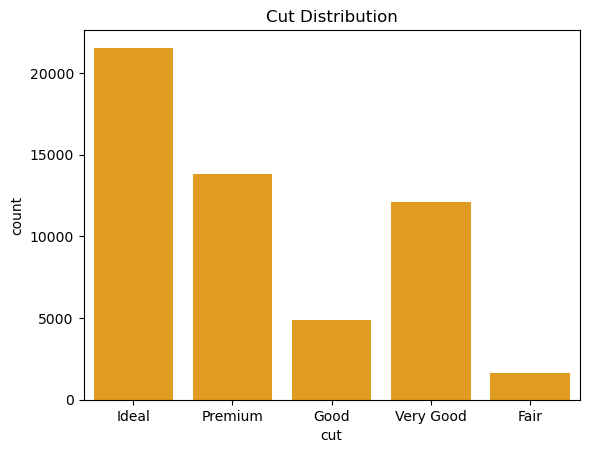

In [137]:
# What are the counts for different quality features?

sns.countplot(data=df, x='cut', color = '#FFA500')
plt.title("Cut Distribution")
plt.show()

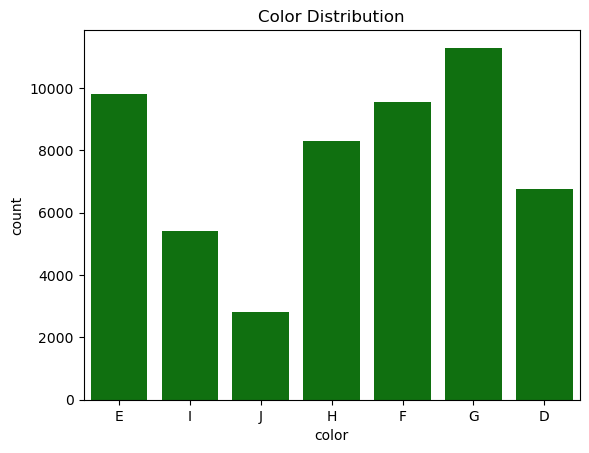

In [139]:
sns.countplot(data=df, x='color', color = 'Green')
plt.title("Color Distribution")
plt.show()

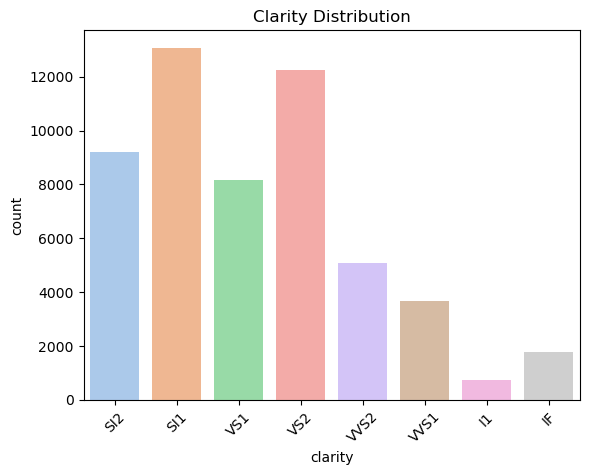

In [135]:
sns.countplot(data=df, x='clarity', hue='clarity', palette='pastel', legend=False)
plt.title("Clarity Distribution")
plt.xticks(rotation=45)
plt.show()

# Clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


<div style="background-color:black; border-left:5px solid #00796b; padding:10px; margin:10px 0; font-size:16px;">
  📌 <strong>Insight:</strong> Most diamonds are of <span style="color:#00796b;"><strong>Ideal cut</strong></span>, <span style="color:#00796b;"><strong>G color</strong></span>, and <span style="color:#00796b;"><strong>SI1 clarity</strong></span>.
</div>

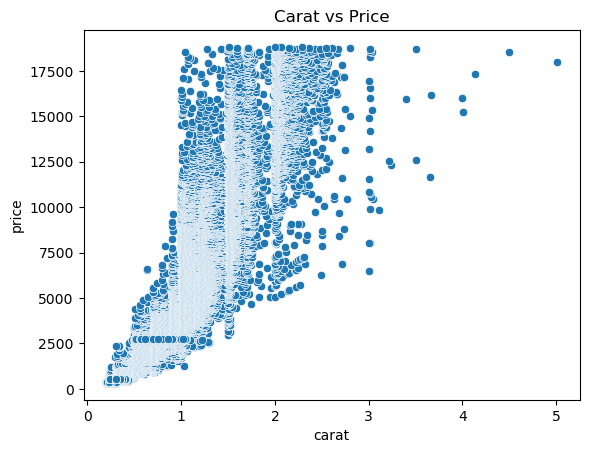

In [119]:
# How does carat size affect price?

sns.scatterplot(x='carat', y='price', data=df)
plt.title("Carat vs Price")
plt.show()

<div style="background-color:black; border-left:5px solid #673ab7; padding:10px; margin:10px 0; font-size:16px;">
  📌 <strong>Insight:</strong> <span style="color:#bb86fc;"><strong>Price increases</strong></span> with <span style="color:#bb86fc;"><strong>carat</strong></span>, but <span style="color:#bb86fc;"><strong>non-linearly</strong></span>.
</div>


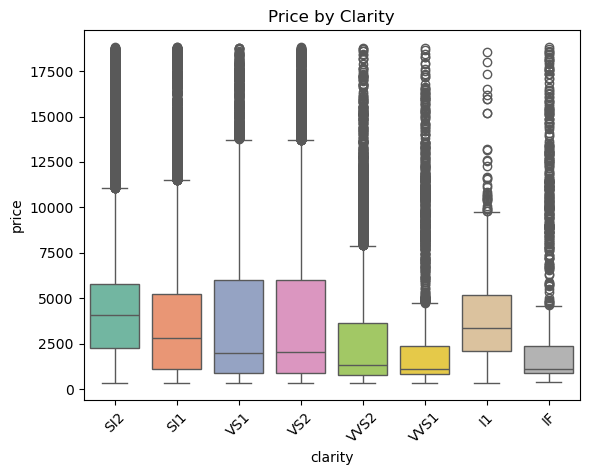

In [125]:
# Q5: How does clarity relate to price?

sns.boxplot(x='clarity', y='price', hue='clarity', data=df, palette='Set2', legend=False)
plt.title("Price by Clarity")
plt.xticks(rotation=45)
plt.show()

<div style="background-color:black; border-left:5px solid #673ab7; padding:10px; margin:10px 0; font-size:16px; color:white;">
  📌 <strong>Insight:</strong> <span style="color:#bb86fc;"><strong>IF</strong></span> and <span style="color:#bb86fc;"><strong>VVS1</strong></span> clarity diamonds tend to have <span style="color:#bb86fc;"><strong>higher price ranges</strong></span>.
</div>


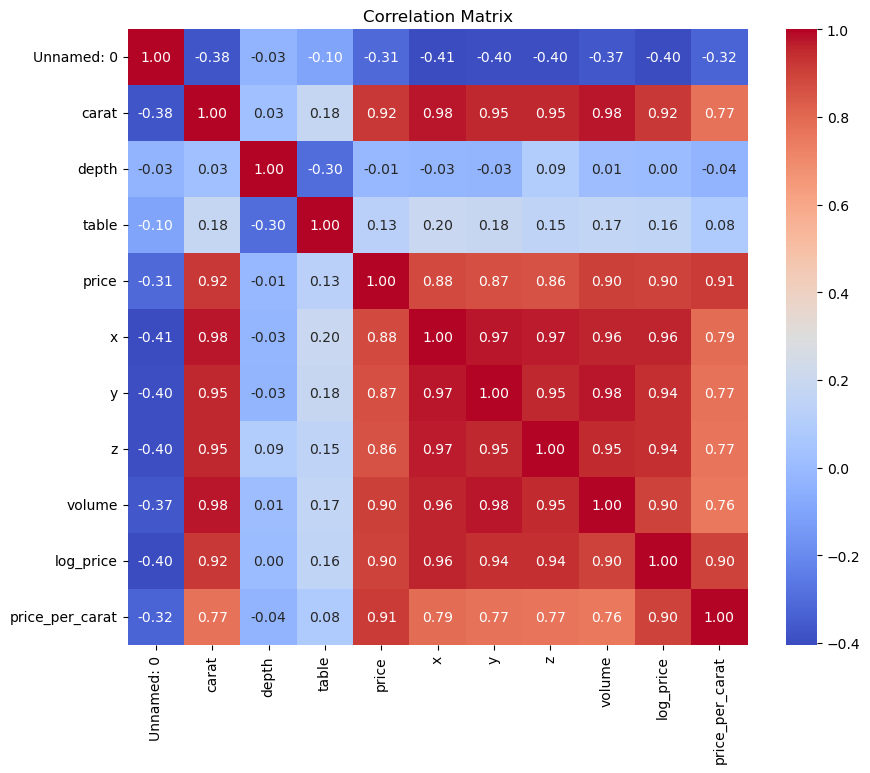

In [144]:
# Q6: What is the correlation between numeric features?

corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [146]:
# create a new feature from dimensions (volume)?

df['volume'] = df['x'] * df['y'] * df['z']

In [101]:
#  What is the average price per carat?

df['price_per_carat'] = df['price'] / df['carat']
print("\nAverage Price Per Carat:", df['price_per_carat'].mean())


Average Price Per Carat: 4008.3947962312695


In [152]:
# What is the most frequent combination of cut, color, and clarity?

most_common_combo = df.groupby(['cut', 'color', 'clarity']).size().idxmax()
print("\nMost frequent combination of cut, color, clarity:", most_common_combo)



Most frequent combination of cut, color, clarity: ('Ideal', 'E', 'VS2')


In [154]:
# Q10: What is the average volume by cut?

avg_volume_by_cut = df.groupby('cut')['volume'].mean()
print("\nAverage volume by cut:")
print(avg_volume_by_cut)


Average volume by cut:
cut
Fair         164.950549
Good         136.257267
Ideal        115.394912
Premium      145.052128
Very Good    130.999722
Name: volume, dtype: float64


<div style="background-color:black; border-left:5px solid #673ab7; padding:10px; margin:10px 0; font-size:16px; color:white;">
  <strong>Conclusion:</strong>
  <ul style="margin-top:8px;">
    <li>Carat size has the highest impact on price.</li>
    <li>Cut, color, and clarity also influence pricing.</li>
    <li>Volume and price per carat give more perspective on value.</li>
  </ul>
</div>
